![image.png](pear.png)

***

# Welcome to Pear Inc. 

Hi there! 
My name is Robert! You can call me Bob 😉. <br>
I'm the communications officer (fancy title ha!) in our glorious company 😇.
My job is to help facilitate product development and market penetration 🤓. <br>
I spent endless hours talking to engineers, product managers, and  customers 😱  

Since we are a 20 people start-up (All of us have fancy names 😂), I also do some recruiting from time to time 💪 <br>
We are looking for **brave souls who are not afraid of a challenge and will help us** with our new product line of smart t-shirts! 🧐 <br> 

(Our CEO believes that smart t-shirts are the right direction for some reason 😅 I guess if you make something nobody needs, you won't have to sell it 🤓) <br>

Let me tell you a little bit more about our problem that you can help us with:<br>
We are creating a life changing smart t-shirt which has bluetooth and connects to your phone 🥳. They will be customizable outfits through downloaded applications. Our smart t-shirt will be developed with Google Wear OS which is a version of Google's Android operating system designed for smartwatches and other wearables. So users will be able to install custom programs through Google Play Store 🤭. <br> And we will sell them for 999.9$ a piece 💰💰💰<br>
But our engineers wanted to ensure that only Pear Inc. approved programs can be installed on our t-shirts because
market analysis showed that potential customers are afraid of ransomware that will break their "*premium*" t-shirts 🤦‍. So we need an antivirus for approving apps on the fly! <br>However, we don't want to install an off the shelf antivirus to our t-shirts 🤫, because BIG profit margins matter 🏦!

##### Enough chit-chat!
Let's get down to the business of why I contacted you: <br>
Our bright engineers came up with an algorithm that creates compressed signatures for the apps in the Google Play Store. It is called '*manifold averaging generally intelligent compressor*' or as we call it 'MAGIC'. <br>
The engineers told us that the outputs of MAGIC reflect the statistical properties of the uncompressed apps (whatever that may mean! 🤦‍). <br> MAGIC takes a Google Play Store app as an input and outputs a 4 dimensional numerical signature (they called it a vector but calling it a vector is not fancy enough for marketing! 🤪).   

Now, since these signatures are just numbers, an off the shelf antivirus can't work with them (even if it could, we can't install an off the shelf antivirus into our t-shirts -- too much computing power and space is needed). Therefore **we need a light weight proof of concept that takes these signatures as inputs and outputs labels (virus or not) for them.** We eventually want to install your program into our smart t-shirts, where it will scan a Google Play Store app (its signature to be precise!) and stop the app's execution if it thinks the app is a virus! But we are not going so far just yet so you only need to create the pipeline that take the signatures, and output labels for them. Don't worry about the rest, it is just a proof of concept at the end 😉. We are providing the dataset for you to develop your model.

In a nutshell: 
- There 4 dimensional (4 feature) numerical inputs (signatures) with labels!
- We need a simple model that takes these inputs and labels them (Virus, Not a Virus)
- We also need you to evaluate your model. Choose any metric you want, but don't forget to explain why, since I don't know much about this field (that is why we need your help!)

Things to keep in mind:
- There are less 'Virus' in the dataset than 'Not a Virus'. (Naturally!)
- While we call it MAGIC, it still sometimes doesn't work well 🤦‍, so there are signatures with missing features (missing values).
- I don't know much about these things so please show your work, your thinking process and please make it as clear as possible, otherwise I get confused 😵. (Visualizations of the data and comments in your code would be great!)

***
##### Let me describe the dataset, and you are ready to get to work!

It is a CSV file. Each row represents a signature for an app. First 4 columns from left to right represent dimensions (features) and the last column is the label (isVirus: True or False). 

- Visualize the data (so that people like me can understand!)
- Clean up the data (balance it out, impute missing values and so on... depending on the method you are going to use!)
- Visualize the cleaned data (so that people like me can understand the effect of cleaning process!)
- Create a simple model that performs reasonably well. (If it doesn't perform well, comment on why and how to improve it!)
- Evaluate the model with a testset you will create from the dataset. (Pretty plots make things easier to understand)
- Upload your code to a private github repo you can share with us, and invite us (https://github.com/tarikkranda, https://github.com/ltc0060 and https://github.com/ahmetkoklu) as collaborators so only we can see our super-secret project. 

And you are done! (Don't forget to comment, and show your work please 🤓)


### SOLUTION :


In [1]:
# Your code here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df[:10]

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True
5,1.239941,5.364270,1.279281,0.938585,True
6,0.003583,-0.027756,3.048730,NaN,True
7,-0.286887,0.905702,1.924124,NaN,True
8,-0.898322,-1.198319,0.694305,0.802052,True
9,-1.084037,0.509091,2.268160,0.351780,True


In [4]:
df.describe()

,feature_1,feature_2,feature_3,feature_4
count,1897.000000,1899.000000,1893.000000,1897.000000
mean,0.814404,1.795843,2.621096,0.807499
std,1.729538,1.605611,1.474973,1.768597
min,-2.285499,-7.363119,-5.363119,-3.006499
25%,-0.556433,0.975148,1.671905,-0.563357
50%,0.084789,1.881904,2.499623,0.021857
75%,2.270955,2.840511,3.470200,2.319822
max,5.929096,7.549658,9.549658,5.759355


In [5]:
df.shape

(1999, 5)

In [6]:
df['isVirus'].isna().sum()

0

C:\Users\canki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\canki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\canki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\canki\anaconda3\lib\si

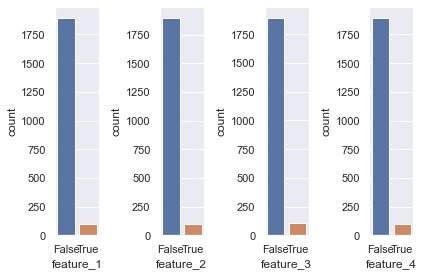

In [7]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(1,4)
sns.countplot(df['feature_1'].isna(), ax=axes[0])
sns.countplot(df['feature_2'].isna(), ax=axes[1])
sns.countplot(df['feature_3'].isna(), ax=axes[2])
sns.countplot(df['feature_4'].isna(), ax=axes[3])
plt.tight_layout()

C:\Users\canki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isVirus', ylabel='count'>

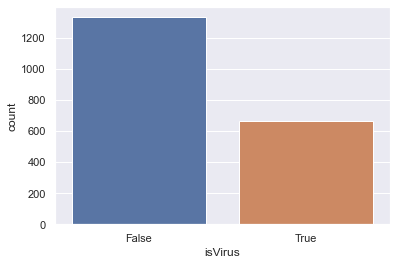

In [8]:
sns.countplot(df['isVirus'])

In [9]:
# Check if there are multiple missing values in a tuple (KNN imputation would be a great idea for a numerical dataset and tuples that have multiple unknown values may cause ambiguousy)
df[df['feature_1'].isna() & df['feature_2'].isna()]

,feature_1,feature_2,feature_3,feature_4,isVirus
379,NaN,NaN,1.964920,-0.469546,True
478,NaN,NaN,2.240434,0.638024,True
520,NaN,NaN,1.368147,-0.719941,True
651,NaN,NaN,2.286210,-0.131909,True
796,NaN,NaN,-0.315828,-0.241369,True
927,NaN,NaN,1.016822,-0.472661,False
1039,NaN,NaN,1.662495,-0.367863,False
1596,NaN,NaN,3.402626,1.224112,False
1918,NaN,NaN,3.183925,2.614510,False


In [10]:
# Drop those tuples
df.dropna(subset=['feature_1', 'feature_2'], how='all', inplace=True)
df.dropna(subset=['feature_1', 'feature_3'], how='all', inplace=True)
df.dropna(subset=['feature_1', 'feature_4'], how='all', inplace=True)
df.dropna(subset=['feature_2', 'feature_3'], how='all', inplace=True)
df.dropna(subset=['feature_3', 'feature_4'], how='all', inplace=True)

In [11]:
# Fill the missing values
X = df[['feature_1', 'feature_2', 'feature_3', 'feature_4']]
imputer = KNNImputer(n_neighbors=3, weights='distance', metric='nan_euclidean')
X = pd.DataFrame(imputer.fit_transform(X), columns = X.columns)

In [12]:
X.isna().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
dtype: int64

In [13]:
df.reset_index(inplace=True)

In [14]:
df['isVirus'][:100]

0     False
1     False
2     False
3     False
4      True
      ...  
95     True
96    False
97    False
98    False
99     True
Name: isVirus, Length: 100, dtype: bool

In [15]:
X['isVirus'] = df['isVirus']

In [16]:
new_df = X.copy()

In [17]:
new_df

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True
...,...,...,...,...,...
1964,2.932724,1.681604,2.629296,2.054384,False
1965,2.532559,2.139847,3.859104,2.190373,False
1966,4.059027,1.977436,2.144760,4.257220,False
1967,3.457310,3.962342,3.770837,3.243168,False


C:\Users\canki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\canki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\canki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\canki\anaconda3\lib\si

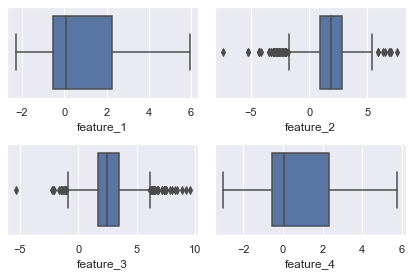

In [18]:
# Outlier detection
fig, axes = plt.subplots(2,2)
sns.boxplot(new_df['feature_1'], ax=axes[0,0])
sns.boxplot(new_df['feature_2'], ax=axes[0,1])
sns.boxplot(new_df['feature_3'], ax=axes[1,0])
sns.boxplot(new_df['feature_4'], ax=axes[1,1])
plt.tight_layout()

In [19]:
# Find interquartile range 
Q1_feature_2 = np.percentile(new_df['feature_2'], 25,
                   interpolation = 'midpoint')
 
Q3_feature_2 = np.percentile(new_df['feature_2'], 75,
                   interpolation = 'midpoint')

IQR_feature_2 = Q3_feature_2 - Q1_feature_2


Q1_feature_3 = np.percentile(new_df['feature_3'], 25,
                   interpolation = 'midpoint')
 
Q3_feature_3 = np.percentile(new_df['feature_3'], 75,
                   interpolation = 'midpoint')

IQR_feature_3 = Q3_feature_3 - Q1_feature_3

In [20]:
new_df[(new_df['feature_2'] >= (Q3_feature_2 + 1.5 * IQR_feature_2)) | (new_df['feature_2'] <= (Q1_feature_2 - 1.5 * IQR_feature_2))].shape

(57, 5)

In [21]:
new_df[(new_df['feature_3'] >= (Q3_feature_3 + 1.5 * IQR_feature_3)) | (new_df['feature_3'] <= (Q1_feature_3 - 1.5 * IQR_feature_3))].shape

(52, 5)

As there are around 100 tuples identified as outliers, which is quite high, dropping them would not be the best idea. An imputation method will be aplied to these values.

In [22]:
# Imputation with boundries
new_df.loc[(new_df['feature_2'] >= (Q3_feature_2 + 1.5 * IQR_feature_2)), 'feature_2'] = Q3_feature_2 + 1.5 * IQR_feature_2
new_df.loc[(new_df['feature_2'] <= (Q1_feature_2 - 1.5 * IQR_feature_2)), 'feature_2'] = Q1_feature_2 - 1.5 * IQR_feature_2

new_df.loc[(new_df['feature_3'] >= (Q3_feature_3 + 1.5 * IQR_feature_3)), 'feature_3'] = Q3_feature_3 + 1.5 * IQR_feature_3
new_df.loc[(new_df['feature_3'] <= (Q1_feature_3 - 1.5 * IQR_feature_3)), 'feature_3'] = Q1_feature_3 - 1.5 * IQR_feature_3

In [23]:
new_df

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True
...,...,...,...,...,...
1964,2.932724,1.681604,2.629296,2.054384,False
1965,2.532559,2.139847,3.859104,2.190373,False
1966,4.059027,1.977436,2.144760,4.257220,False
1967,3.457310,3.962342,3.770837,3.243168,False


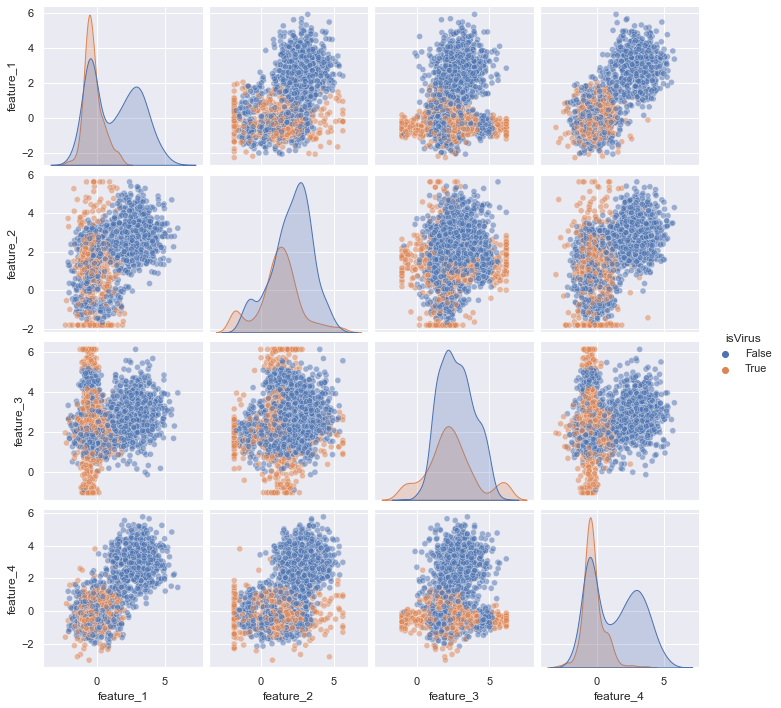

In [24]:
sns.pairplot(new_df, hue="isVirus", plot_kws = {'alpha': 0.5})

feature_1 and feature_4 are positively correlated as shown above but their combination when they are both low (feature_1 < 1 and feature_4 < 3) plays a role to identify 'True' labeled instances.

In [25]:
X = new_df[['feature_1', 'feature_2', 'feature_3', 'feature_4']]
y = new_df[['isVirus']]

In [26]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [27]:
min_max_scaler = preprocessing.MinMaxScaler()

In [28]:
# Range normalization
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99, shuffle=True)

In [30]:
# Oversampling
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

C:\Users\canki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isVirus', ylabel='count'>

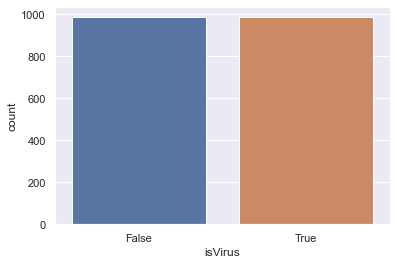

In [31]:
sns.countplot(y_train['isVirus'])

There are only 2000 tuples approximately, so lazy learners could be used. KNN would be a great option for this dataset as all the features are numeric.

In [32]:
knn = KNeighborsClassifier()

In [33]:
knn.fit(X_train, y_train)

C:\Users\canki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [34]:
# Compute train accuracy 
y_pred = knn.predict(X_train)

In [35]:
accuracy_score(y_train, y_pred)

0.9321175278622087

In [36]:
# Compute test accuracy 
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8519269776876268

In [60]:
# 10-fold Cross Validation Prediction 
cvp = cross_val_predict(knn, X, y, cv=10)

C:\Users\canki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\canki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\canki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\canki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [61]:
cm = confusion_matrix(y, cvp)

<AxesSubplot:>

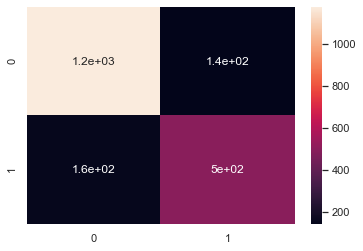

In [65]:
sns.heatmap(cm, annot=True)

KNN performed 85% accuracy approximately, but it can be elivated. An efficient k-value can be found for this dataset. This technique includes taking each tuple as a query and predicted with predefined n_neighbor values (1, 3, 5, 7, ..). Whichever performed better amoung these values is chosen. Also, distance can be taken as the weight. The p-value which is used for finding the distance can be changed. There are many other techniques to increase the performance of the KNN Classifier.